<a href="https://colab.research.google.com/github/wesleybeckner/technology_fundamentals/blob/main/C2%20Statistics%20and%20Model%20Creation/SOLUTIONS/SOLUTION_Tech_Fun_C2_L1_Data_Hunt_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Technology Fundamentals Course 2, Lab 1: Data Hunt I

**Instructor**: Wesley Beckner

**Contact**: wesleybeckner@gmail.com

**Teaching Assitants**: Varsha Bang, Harsha Vardhan

**Contact**: vbang@uw.edu, harshav@uw.edu
<br>

---

<br>

That's right you heard correctly. It's a data hunt.

<br>

---




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/wesleybeckner/"\
  "technology_explorers/main/assets/imdb_movies.csv")

# converting years to numbers for easy conditionals
df['year'] = pd.to_numeric(df['year'], errors='coerce')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Q1 What american director has the highest average vote?

In [ ]:
df.loc[df['country'] == 'USA'].groupby('director')['avg_vote'].mean().sort_values(ascending=False)

director
Daniel Keith, Snorri Sturluson    9.3
Anthony Bawn                      9.3
Derek Ahonen                      9.2
Raghav Peri                       9.1
James Marlowe                     8.8
                                 ... 
Waleed Bedour                     1.2
Fred Ashman                       1.1
Aeneas Middleton                  1.1
Steven A. Sandt                   1.1
Francis Hamada                    1.1
Name: avg_vote, Length: 12463, dtype: float64

# Q2 What american director with more than 5 movies, has the highest average vote?

In [ ]:
df.loc[df['country'] == 'USA'].groupby('director').filter(lambda x: x.shape[0] > 5).groupby('director')['avg_vote'].mean().sort_values(ascending=False)

director
Quentin Tarantino     7.811111
Charles Chaplin       7.764286
David Fincher         7.625000
Billy Wilder          7.580952
Martin Scorsese       7.544444
                        ...   
Barry Mahon           2.728571
Dennis Devine         2.657143
Bill Zebub            2.483333
Mark Polonia          2.462500
Christopher Forbes    2.000000
Name: avg_vote, Length: 859, dtype: float64

# Q3 What director has the largest variance in rankings?

In [ ]:
df.groupby('director')['avg_vote'].std().sort_values(ascending=False)

director
Deniz Denizciler              4.030509
Rudi Lagemann                 3.747666
Emilio Ruiz Barrachina        3.676955
Krishna Ghattamaneni          3.676955
Milos Avramovic               3.606245
                                ...   
Ümit Degirmenci                    NaN
Ümit Elçi                          NaN
Ümit Köreken                       NaN
Þorsteinn Gunnar Bjarnason         NaN
Þórhildur Þorleifsdóttir           NaN
Name: avg_vote, Length: 34733, dtype: float64

# Q4 What director with more than 10 movies has the largest variance in rankings?

In [ ]:
df.groupby('director').filter(lambda x: x.shape[0] > 10).groupby('director')['avg_vote'].std().sort_values(ascending=False)

director
Harry Baweja         1.869954
Shaji Kailas         1.854502
Zdenek Troska        1.775984
Adam Rifkin          1.711251
Ram Gopal Varma      1.687850
                       ...   
Ford Beebe           0.224343
Ray Nazarro          0.210311
Jean Grémillon       0.196946
Louis Feuillade      0.156428
Tsutomu Shibayama    0.126121
Name: avg_vote, Length: 1135, dtype: float64

# Q5 What american directors with more than 5 movies have the largest variance in rankings?

In [ ]:
df.loc[df['country'] == 'USA'].groupby('director').filter(lambda x: x.shape[0] > 5).groupby('director')['avg_vote'].std().sort_values(ascending=False)

director
Martin Brest          2.033716
David Winters         1.926049
Adam Rifkin           1.711251
Gus Trikonis          1.661271
Jerry Jameson         1.646107
                        ...   
Edward Killy          0.155265
Willis Goldbeck       0.139443
Richard T. Heffron    0.136626
Bill Plympton         0.136626
Nate Watt             0.129099
Name: avg_vote, Length: 859, dtype: float64

# Q6 Where does M. Night Shamalyan fall on this rank scale?

(He's number 36/859)

In [ ]:
dff = df.loc[df['country'] == 'USA'].groupby('director').filter(lambda x: x.shape[0] > 5).groupby('director')['avg_vote'].std().sort_values(ascending=False)
dff = pd.DataFrame(dff).reset_index()
dff.loc[dff['director'].str.contains("Shyamalan")]

,director,avg_vote
36,M. Night Shyamalan,1.258791


# Q7 How many movies were made each year in US from 2000-2020

In [ ]:
df.loc[(df['year'] >= 2000) & (df['country'] == 'USA')].groupby('year')['title'].count()

year
2000.0    363
2001.0    386
2002.0    360
2003.0    339
2004.0    362
2005.0    453
2006.0    590
2007.0    574
2008.0    592
2009.0    656
2010.0    611
2011.0    652
2012.0    738
2013.0    820
2014.0    807
2015.0    800
2016.0    869
2017.0    905
2018.0    886
2019.0    700
2020.0    276
Name: title, dtype: int64

# Q8 Visualize The Results of Q7!

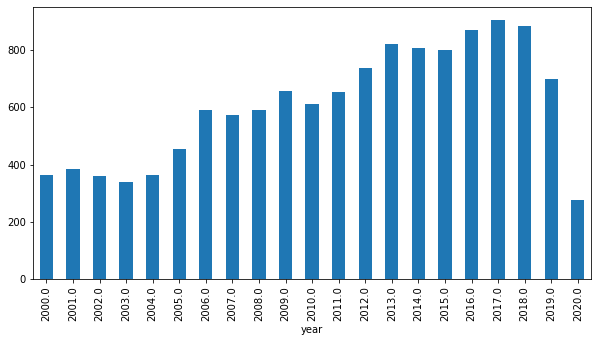

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
df.loc[(df['year'] >= 2000) & (df['country'] == 'USA')].groupby('year')['title'].count().plot(kind='bar', ax=ax)

# Q9 For single country movies, how many movies were made each year in each country from 2000-2020, only include countries that made more than 1000 movies in that timeframe

In [ ]:
dff = pd.DataFrame(df.loc[(df['year'] >= 2000) &
       ((df['country'].str.contains(',')) == False)]\
       .groupby('country').filter(lambda x: x.shape[0] > 1000)\
       .groupby(['country', 'year'])['title'].count())
dff = dff.reset_index()
dff.head()

,country,year,title
0,Canada,2000.0,39
1,Canada,2001.0,51
2,Canada,2002.0,49
3,Canada,2003.0,38
4,Canada,2004.0,52


# Q10 Visualize the results from Q9!

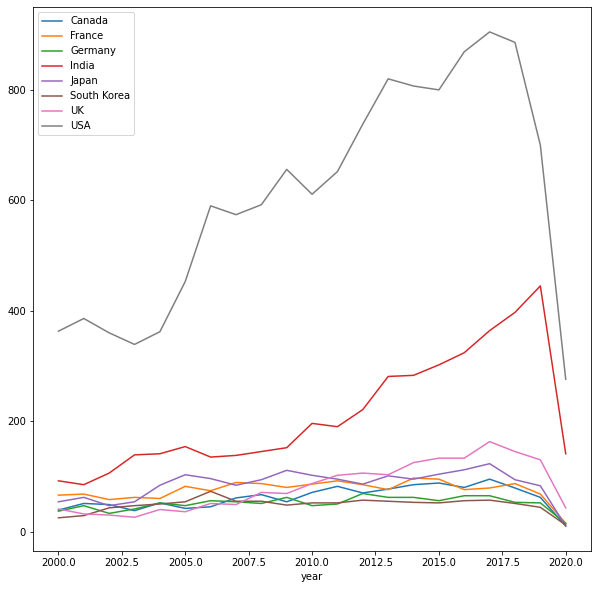

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
for country in dff.country.unique():
  dff.loc[dff['country'] == country].plot(x='year', y='title', 
                                          label=country, ax=ax)
